# Bike Sharing Regression with Pytorch

This notebook uses the bike sharing dataset to perform regression using a neural network with Pytorch. The work is based on the tutorial by Janani Ravi.

Download link: https://www.kaggle.com/marklvl/bike-sharing-dataset

* instant: Record index
* dteday: Date
* season: Season (1:springer, 2:summer, 3:fall, 4:winter)
* yr: Year (0: 2011, 1:2012)
* mnth: Month (1 to 12)
* hr: Hour (0 to 23)
* holiday: weather day is holiday or not (extracted from Holiday Schedule)
* weekday: Day of the week
* workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit: (extracted from Freemeteo)
 -  1: Clear, Few clouds, Partly cloudy, Partly cloudy
 -  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 -  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 -  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

# 1.0 Import Libraries and Data

In [1]:
# Torch
import torch
import hiddenlayer as hl
import torch.utils.data as data_utils # for creating batches

# Python
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data Science
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/Users/imoge/Projects/Datasets/bike_sharing', index_col=0)                        

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.shape

(731, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.1+ KB


# 2.0 Data Exploration

## Bike Rentals by Year and Season

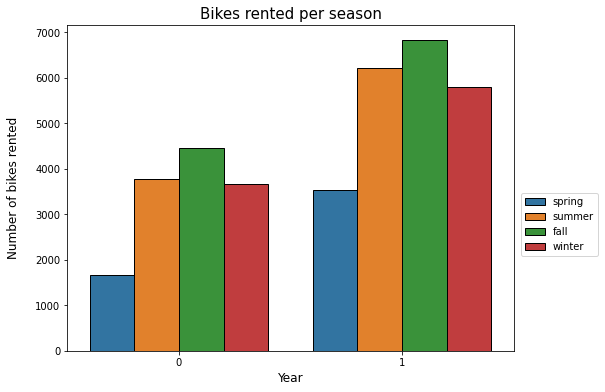

In [6]:
# Plot the bike rentals by season for each of the two years

fig, ax = plt.subplots( figsize = (8,6))
sns.barplot(data = data, x = 'yr', y = 'cnt',hue = 'season',ci = None, ec = 'k')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Number of bikes rented',labelpad = 15, fontsize = 12)
plt.title('Bikes rented per season', fontsize = 15);

* Bike rentals increased in the second year
* Bike rentals are greatest in autumn and the least in spring

## Bike Rentals by Month and By Working Day

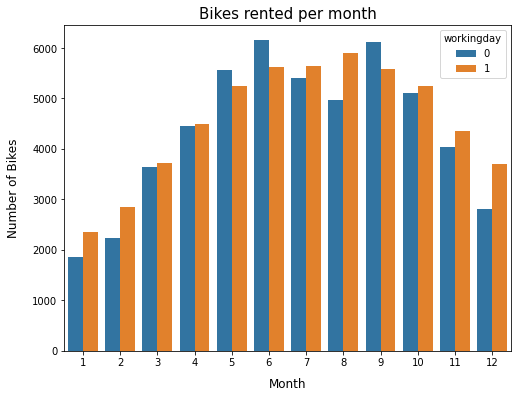

In [7]:
# Plot rentals by month
fig, ax = plt.subplots( figsize = (8,6))
sns.barplot(data = data,x = 'mnth', y = 'cnt',hue = 'workingday', ci = None)
plt.xlabel("Month", fontsize = 12, labelpad = 10)
plt.ylabel("Number of Bikes", fontsize = 12, labelpad = 12)
plt.title('Bikes rented per month', fontsize = 15);

* Most bikes are rented in the summer months between May and September
* More bikes are rented on weekends and holidays than working days (Working Days are coded as 1 and holidays and weekends as 0)

# Bike Rentals by Temperature

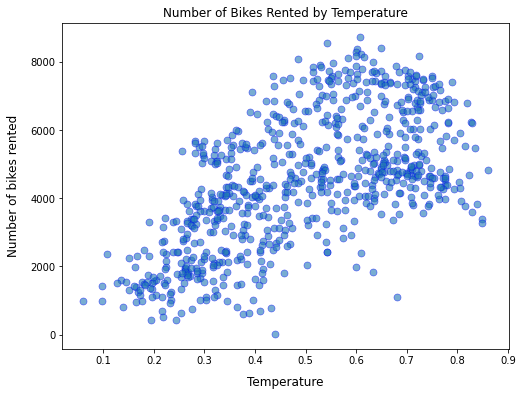

In [8]:
# Bike rentals by temperature
fig, ax = plt.subplots( figsize = (8,6))
fig = sns.scatterplot(x = 'temp', y = 'cnt', data = data, alpha = 0.6, ec = 'b', s= 50)
plt.xlabel('Temperature', fontsize = 12, labelpad = 10)
plt.ylabel('Number of bikes rented', fontsize = 12, labelpad = 10)
plt.title("Number of Bikes Rented by Temperature");

* More bikes are rented in hotter weather

# Relationship Between Bike Rentals and Each Variable

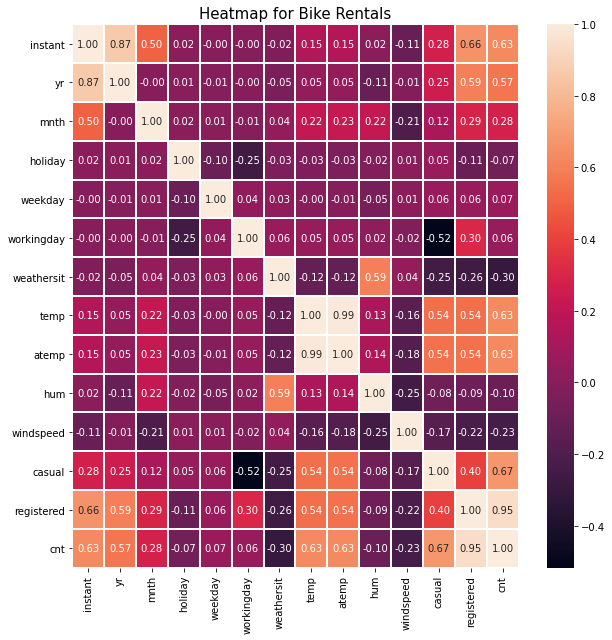

In [9]:
fig, ax = plt.subplots( figsize = (10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')
plt.title("Heatmap for Bike Rentals", fontsize = 15);

# 3.0 Data Preparation

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 113.2+ KB


In [11]:
# Convert season using one-hot encoding
data = pd.get_dummies(data, columns= ['season'])
data.sample(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter
682,683,2012-11-13,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094,0,0,0,1
584,585,2012-08-07,1,8,0,2,1,2,0.735833,0.697621,0.703750,0.116908,1278,5995,7273,1,0,0,0
110,111,2011-04-21,0,4,0,4,1,1,0.459167,0.453892,0.407083,0.325258,745,3444,4189,0,0,1,0
192,193,2011-07-12,0,7,0,2,1,1,0.794167,0.739275,0.559167,0.200254,662,3596,4258,1,0,0,0
515,516,2012-05-30,1,5,0,3,1,2,0.656667,0.611129,0.670000,0.134329,745,6110,6855,0,0,1,0


In [12]:
# Choose features of interest
columns = ['registered', 'holiday', 'weekday', 
           'weathersit', 'temp', 'atemp',
           'season_fall', 'season_spring', 
           'season_summer', 'season_winter']


X = data[columns]

In [13]:
X.head()

,registered,holiday,weekday,weathersit,temp,atemp,season_fall,season_spring,season_summer,season_winter
0,654,0,6,2,0.344167,0.363625,0,1,0,0
1,670,0,0,2,0.363478,0.353739,0,1,0,0
2,1229,0,1,1,0.196364,0.189405,0,1,0,0
3,1454,0,2,1,0.200000,0.212122,0,1,0,0
4,1518,0,3,1,0.226957,0.229270,0,1,0,0


In [14]:
# Target values
y = data[['cnt']]

In [15]:
y.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


In [16]:
# Create training and test sets
X_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [17]:
# Create tensors
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [18]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([584, 10]) torch.Size([584, 1])


In [19]:
X_train_tensor

tensor([[5.0380e+03, 0.0000e+00, 6.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.9950e+03, 0.0000e+00, 2.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.5050e+03, 0.0000e+00, 6.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [2.3480e+03, 0.0000e+00, 5.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.1470e+03, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [3.6950e+03, 0.0000e+00, 2.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [20]:
y_train_tensor

tensor([[7865.],
        [7273.],
        [5923.],
        [3894.],
        [5805.],
        [4205.],
        [7216.],
        [7446.],
        [5992.],
        [3403.],
        [7286.],
        [3117.],
        [5585.],
        [4792.],
        [7410.],
        [3204.],
        [5611.],
        [3372.],
        [7282.],
        [5115.],
        [7444.],
        [7713.],
        [7605.],
        [6203.],
        [2368.],
        [1162.],
        [5375.],
        [4378.],
        [1096.],
        [5046.],
        [1495.],
        [2429.],
        [5191.],
        [6660.],
        [3855.],
        [4509.],
        [6207.],
        [1416.],
        [2843.],
        [8294.],
        [3190.],
        [7582.],
        [6536.],
        [1301.],
        [6786.],
        [3249.],
        [4058.],
        [6770.],
        [1851.],
        [1349.],
        [6855.],
        [1543.],
        [1204.],
        [2475.],
        [7261.],
        [4906.],
        [3926.],
        [6133.],
        [2710.

In [21]:
# Create train data tensor dataset
train_data = data_utils.TensorDataset(X_train_tensor, y_train_tensor)

In [22]:
# Create data loader object on train data specifying batch size
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [23]:
# Number of batches (each with 100 samples except for the last batch)
len(train_loader)

6

In [24]:
# Iterate through the batches
features_batch, target_batch = iter(train_loader).next()

In [25]:
# Check the batch size matches
features_batch.shape

torch.Size([100, 10])

In [26]:
# Check the batch size matches
target_batch.shape

torch.Size([100, 1])

# 4.0 Set up the Neural Network and Train

In [27]:
# Specify parameters for the network
inp = X_train_tensor.shape[1]  # depends on the number of features
out = 1 # predict one output - demand for bikes
hid = 10 # 10 neurons per hidden layer
loss_fn = torch.nn.MSELoss() # loss function for regression

## Model 1

In [28]:
# Build Model 1
model1 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, out))


(process:16080): Pango-WARNING **: 18:46:01.698: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


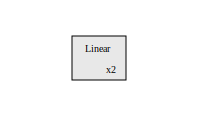

In [29]:
# Visualise model
hl.build_graph(model1, torch.zeros([10,inp])).build_dot()

In [30]:
# Define optimizer and learning rate
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.001)

In [31]:
# Train the model
def train_model(mod):
    
    total_step = len(train_loader) # number of batches
    num_epochs = 10000 # number of epochs

    for epoch in range(num_epochs + 1):
        for i, (X, y) in enumerate(train_loader): # feed in the training data in batches
        
            output = mod(X) # forward pass through the network
            loss = loss_fn(output, y) # current loss
        
            optimizer.zero_grad() # start from zero gradient
        
            loss.backward() # calculate gradients 
        
            optimizer.step() # update model parameters
        
            if epoch % 2000 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item())) # print loss for each 2000 epochs

In [32]:
train_model(model1)

Epoch [1/10000], Step [1/6], Loss: 18323496.0000
Epoch [1/10000], Step [2/6], Loss: 19848870.0000
Epoch [1/10000], Step [3/6], Loss: 19095302.0000
Epoch [1/10000], Step [4/6], Loss: 18948294.0000
Epoch [1/10000], Step [5/6], Loss: 19820884.0000
Epoch [1/10000], Step [6/6], Loss: 18102202.0000
Epoch [2001/10000], Step [1/6], Loss: 297988.0938
Epoch [2001/10000], Step [2/6], Loss: 354331.6250
Epoch [2001/10000], Step [3/6], Loss: 332357.9062
Epoch [2001/10000], Step [4/6], Loss: 438424.7500
Epoch [2001/10000], Step [5/6], Loss: 372770.1875
Epoch [2001/10000], Step [6/6], Loss: 486573.2812
Epoch [4001/10000], Step [1/6], Loss: 340583.4375
Epoch [4001/10000], Step [2/6], Loss: 374360.0312
Epoch [4001/10000], Step [3/6], Loss: 216661.5781
Epoch [4001/10000], Step [4/6], Loss: 353796.9688
Epoch [4001/10000], Step [5/6], Loss: 400864.7188
Epoch [4001/10000], Step [6/6], Loss: 306453.7500
Epoch [6001/10000], Step [1/6], Loss: 315436.1562
Epoch [6001/10000], Step [2/6], Loss: 215507.7969
Epoch 

# 5.0 Evaluation of Model

In [33]:
# Switch to evaluation mode - required as dropout and batch normalisation can behave differently between training and evaluation
model1.eval()

with torch.no_grad():  # turn off gradients
    y_pred = model1(x_test_tensor)

In [34]:
# Take a sample from the test dataset
samp = x_test.iloc[30]
samp

registered       5520.000000
holiday             0.000000
weekday             4.000000
weathersit          2.000000
temp                0.365833
atemp               0.369942
season_fall         0.000000
season_spring       0.000000
season_summer       0.000000
season_winter       1.000000
Name: 670, dtype: float64

In [35]:
# Convert to tensor
samp_tensor = torch.tensor(samp.values, 
                             dtype = torch.float)
samp_tensor

tensor([5.5200e+03, 0.0000e+00, 4.0000e+00, 2.0000e+00, 3.6583e-01, 3.6994e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00])

In [36]:
# Predict the output of the sample datapoint
with torch.no_grad():
    y_pred = model1(samp_tensor)

print("Predicted count : ", (y_pred.item()))
print("Actual count : ", (y_test.iloc[30]))

Predicted count :  6124.78076171875
Actual count :  cnt    5986
Name: 670, dtype: int64


In [37]:
# Predict against all the test set
with torch.no_grad():
    y_pred_tensor = model1(x_test_tensor)

In [38]:
# Convert to numpy array
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(147, 1)

In [39]:
# Put results in a dataframe
results = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
results = round(results,0)
results.sample(10)

,actual,predicted
88,1321,1401.0
128,6053,5286.0
19,4679,5093.0
39,1685,1810.0
145,5138,4660.0
142,1606,1781.0
105,5058,5531.0
79,4744,4082.0
99,2471,1688.0
61,4844,5243.0


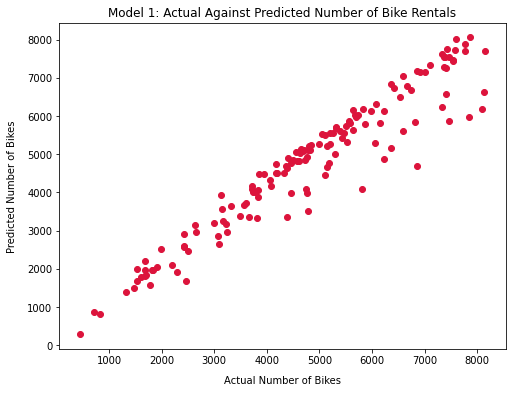

In [40]:
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(x = results.actual,y = results.predicted, c= "crimson")
plt.xlabel("Actual Number of Bikes", labelpad = 10)
plt.ylabel("Predicted Number of Bikes", labelpad = 10)
plt.title("Model 1: Actual Against Predicted Number of Bike Rentals");

In [41]:
# Get r2 score - how much of the variance is captured by our model 
sklearn.metrics.r2_score(y_test, y_pred)

0.9155218262404211

## Model 2 - With ReLU Activation

In [42]:
# Build Model 2
model2 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.ReLU(),
                             torch.nn.Linear(hid, out))


(process:7872): Pango-WARNING **: 18:47:00.584: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


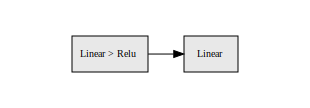

In [43]:
# Visualise model
hl.build_graph(model2, torch.zeros([10,inp])).build_dot()

In [44]:
# Define optimizer and learning rate
optimizer = torch.optim.Adam(model2.parameters(), lr = 0.001)

In [45]:
train_model(model2)

Epoch [1/10000], Step [1/6], Loss: 21074426.0000
Epoch [1/10000], Step [2/6], Loss: 24032702.0000
Epoch [1/10000], Step [3/6], Loss: 24415148.0000
Epoch [1/10000], Step [4/6], Loss: 22615196.0000
Epoch [1/10000], Step [5/6], Loss: 18379612.0000
Epoch [1/10000], Step [6/6], Loss: 21712918.0000
Epoch [2001/10000], Step [1/6], Loss: 458425.1562
Epoch [2001/10000], Step [2/6], Loss: 403243.5312
Epoch [2001/10000], Step [3/6], Loss: 352519.4688
Epoch [2001/10000], Step [4/6], Loss: 383154.7500
Epoch [2001/10000], Step [5/6], Loss: 334364.8125
Epoch [2001/10000], Step [6/6], Loss: 422995.1562
Epoch [4001/10000], Step [1/6], Loss: 325196.0000
Epoch [4001/10000], Step [2/6], Loss: 427008.5938
Epoch [4001/10000], Step [3/6], Loss: 459071.7500
Epoch [4001/10000], Step [4/6], Loss: 349825.1875
Epoch [4001/10000], Step [5/6], Loss: 322171.8125
Epoch [4001/10000], Step [6/6], Loss: 294159.0312
Epoch [6001/10000], Step [1/6], Loss: 242032.3594
Epoch [6001/10000], Step [2/6], Loss: 260762.2656
Epoch 

In [46]:
# Switch to evaluation mode - required as dropout and batch normalisation can behave differently between training and evaluation
model2.eval()

with torch.no_grad():  # turn off gradients
    y_pred = model2(x_test_tensor)
    
# Predict against all the test set
with torch.no_grad():
    y_pred_tensor = model2(x_test_tensor)
    
# Convert to numpy array
y_pred = y_pred_tensor.detach().numpy()

# Put results in a dataframe
results2 = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
results2 = round(results,0)
results2.sample(10)

,actual,predicted
108,5572,5808.0
118,4400,4891.0
18,8090,6190.0
134,5382,5601.0
11,5146,5223.0
100,5298,5017.0
138,4322,4517.0
83,3727,4167.0
35,6591,7051.0
54,1538,1689.0


In [47]:
# Get r2 score - how much of the variance is captured by our model 
sklearn.metrics.r2_score(y_test, y_pred)

0.913288186076765

## Model 3 - With Dropout

In [48]:
# Build Model 3
model3 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.ReLU(),
                             torch.nn.Dropout(p=0.2), # probability a neuron is turned off
                             torch.nn.Linear(hid, out))

C:\Users\imoge\Anaconda3\envs\PYTORCH\lib\site-packages\torch\onnx\symbolic_opset9.py:1630: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "

(process:21616): Pango-WARNING **: 18:48:00.772: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


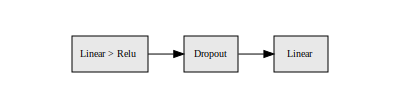

In [49]:
# Visualise model
hl.build_graph(model3, torch.zeros([10,inp])).build_dot()

In [50]:
# Define optimizer and learning rate
optimizer = torch.optim.Adam(model3.parameters(), lr = 0.001)

In [51]:
train_model(model3)

Epoch [1/10000], Step [1/6], Loss: 27487132.0000
Epoch [1/10000], Step [2/6], Loss: 21640412.0000
Epoch [1/10000], Step [3/6], Loss: 27326882.0000
Epoch [1/10000], Step [4/6], Loss: 21095512.0000
Epoch [1/10000], Step [5/6], Loss: 24018338.0000
Epoch [1/10000], Step [6/6], Loss: 26198046.0000
Epoch [2001/10000], Step [1/6], Loss: 2112183.0000
Epoch [2001/10000], Step [2/6], Loss: 3342674.5000
Epoch [2001/10000], Step [3/6], Loss: 2998620.2500
Epoch [2001/10000], Step [4/6], Loss: 3634644.5000
Epoch [2001/10000], Step [5/6], Loss: 2699336.0000
Epoch [2001/10000], Step [6/6], Loss: 4087289.2500
Epoch [4001/10000], Step [1/6], Loss: 3012100.5000
Epoch [4001/10000], Step [2/6], Loss: 1850486.7500
Epoch [4001/10000], Step [3/6], Loss: 2357018.0000
Epoch [4001/10000], Step [4/6], Loss: 2504462.5000
Epoch [4001/10000], Step [5/6], Loss: 2840936.2500
Epoch [4001/10000], Step [6/6], Loss: 2892099.0000
Epoch [6001/10000], Step [1/6], Loss: 2134902.7500
Epoch [6001/10000], Step [2/6], Loss: 20536

In [52]:
# Switch to evaluation mode - required as dropout and batch normalisation can behave differently between training and evaluation
model3.eval()

with torch.no_grad():  # turn off gradients
    y_pred = model3(x_test_tensor)
    
# Predict against all the test set
with torch.no_grad():
    y_pred_tensor = model3(x_test_tensor)
    
# Convert to numpy array
y_pred = y_pred_tensor.detach().numpy()

# Put results in a dataframe
results3= pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
results3 = round(results,0)
results3.sample(10)

,actual,predicted
88,1321,1401.0
45,4576,4812.0
69,3141,3570.0
130,6598,5602.0
113,6230,6121.0
0,4195,4500.0
23,5558,5808.0
54,1538,1689.0
18,8090,6190.0
107,4758,3990.0


In [53]:
# Get r2 score - how much of the variance is captured by our model 
sklearn.metrics.r2_score(y_test, y_pred)

0.8394873124876104

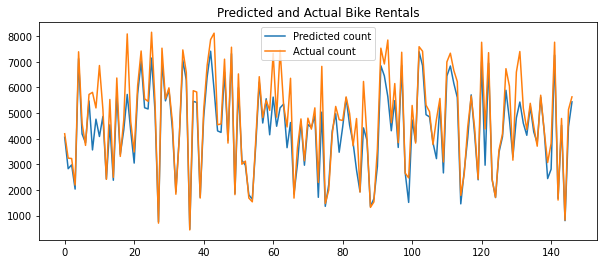

In [56]:
plt.figure(figsize=(10,4))

plt.plot(y_pred, label='Predicted count')
plt.plot(y_test.values, label='Actual count')
plt.title("Predicted and Actual Bike Rentals")
plt.legend()
plt.show()

# 6.0 Saving the Model

In [55]:
#torch.save(model, 'my_model')

In [ ]:
#saved_model = torch.load('my_model')

In [ ]:
#y_pred_tensor = saved_model(x_test_tensor)

In [ ]:
#y_pred = y_pred_tensor.detach().numpy()